# A Process in Python has 3 basic component
* An executable program
* The associated data needed by the program such as variables, workspace, buffers
* The execution context of the program (The state of the process)

## A Thread is an Entity within a process that can be schedules for execution. Thread is a smallest unit of processing that can be performed in the OS.

## A Thread contains all this information in a Thread Control Block (TCB)

* Thread Identifier - A Unique id (TID) is assigned to every new thread
* Stack pointer - Points to the thread's stack in the process. The stack contains the local variable under the thread's scope
* Program counter - a register that stores the address of the instruction currently being executed by a thread
* Thread state - It contains the state of the thread. Can be ready, starting, running, waiting or done.
* Thread register set - registers assigned to thread for computation.
* Parent process pointer - A Pointer to the process control block (PCB) of process that the thread lives on.

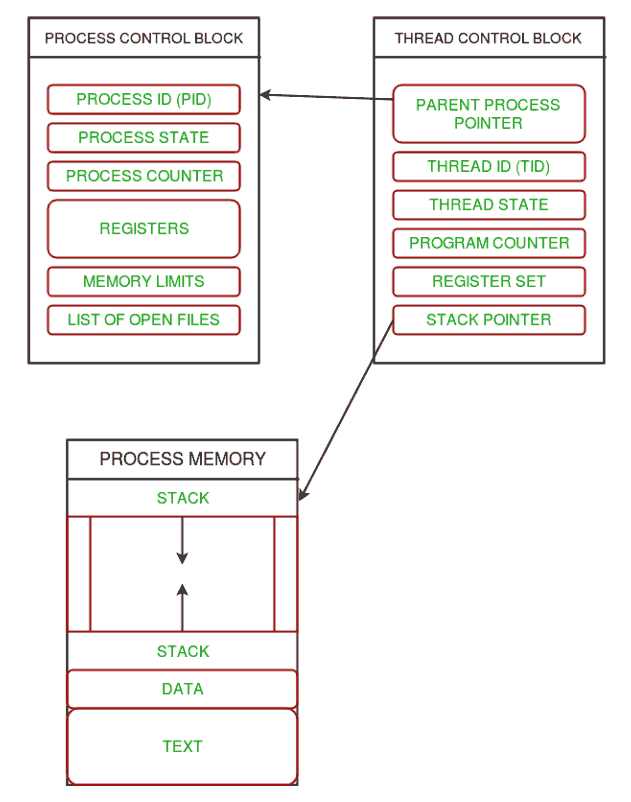

## Multiple threads can exist within one process where:

* Each thread contains its own register set and local variables (stored in the stack) .
* All threads of a process share global variables (stored in heap) and the program code .

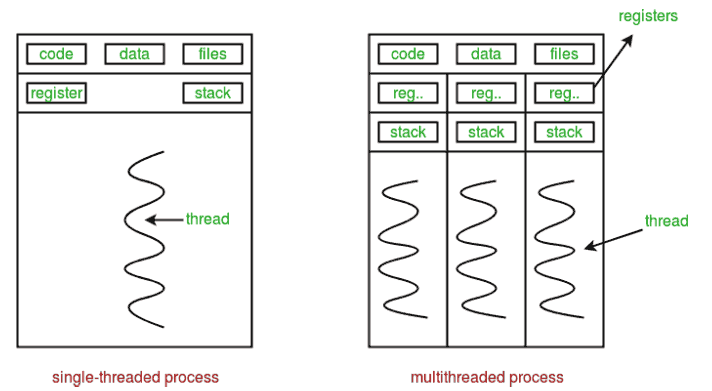

## Context Switching 

### The state of a thread is saved and the state of another thread is loaded whenever any interrupt (due to I/O or manually set) takes places
### CS takes place so often or frequently that all the threads seems like they are running parallelly (this is termed as multitasking)

In [4]:
import threading

In [15]:
def mul(x,y):
    print(x * y)
def add(x, y):
    print(x + y)


t1 = threading.Thread(target = mul, args = (2,3,))
t2 = threading.Thread(target = add, args = (2,3,))

print("YO")

t1.start()
t2.start()

print("Hello")

t1.join()
t2.join()

print("Completed")

YO
6
5
Hello
Completed


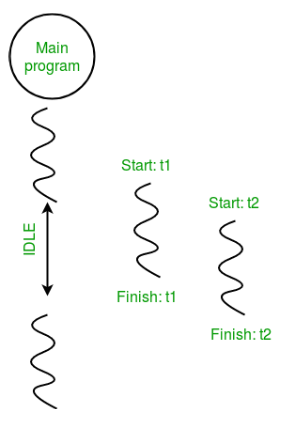

## To get the ID of process and threads to which different tasks are assigned

In [19]:
import os
os.getpid()

4288

In [26]:
def task1():
    print("Task1 is assigned to Thread: {}".format(threading.current_thread().name))
    print("ID of the process under which task 1 is running: {}".format(os.getpid()))

def task2():
    print("Task2 is assigned to Thread: {}".format(threading.current_thread().name))
    print("ID of the process under which task 2 is running: {}".format(os.getpid()))


print("ID of process running this main program: {}".format(os.getpid()))

print("Main Thread name: {}".format(threading.current_thread().name))

t1 = threading.Thread(target = task1, name = 't1')
t2 = threading.Thread(target = task2, name = 't2')

t1.start()
t2.start()

t1.join()
t2.join()

ID of process running this main program: 4288
Main Thread name: MainThread
Task1 is assigned to Thread: t1
ID of the process under which task 1 is running: 4288
Task2 is assigned to Thread: t2
ID of the process under which task 2 is running: 4288


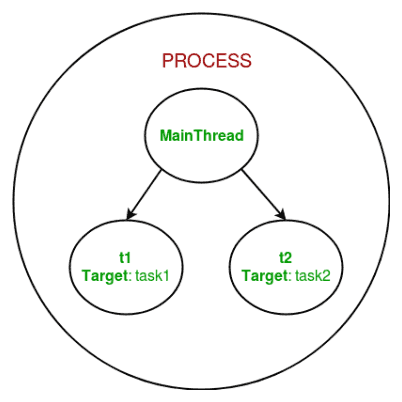

# ThreadPool

In [27]:
import concurrent

In [34]:
def random():
    print("Thread running")

pool = concurrent.futures.ThreadPoolExecutor(max_workers=3)

pool.submit(random)
pool.submit(random)
pool.submit(random)

pool.shutdown(wait=True)

print("Main Thread continues from here")

Thread running
Thread running
Thread running
Main Thread continues from here


# There are main two types of thread in python
* Main Thread  : The initial thread of execution when the program starts. 
* Daemon Threads  : Background threads that automatically exit when the main thread terminates. 
* Non-Daemon Threads  : Threads that continue to run until they complete their task, even if the main thread exits. 